In [388]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

finding_k = pd.read_csv('Preprocessed NBA Data.csv')
data_columns = finding_k[['Position', 'Ht', 'Wt', 'College PTS', 'College TRB', 'College AST', 'College FG%', 'College 3P%', 'College FT%']].values.tolist()
labels_columns = finding_k[['PTS', 'TRB', 'AST', 'FG%', '3PT%', 'FT%']].values.tolist()

normalized_data_columns = normalize(data_columns)
print(normalized_data_columns[0])
normalized_labels_columns = normalize(labels_columns)
k_training_data, k_testing_data, k_training_labels, k_testing_labels = train_test_split(normalized_data_columns, normalized_labels_columns, test_size = .2, random_state = 90)
print(len(k_training_data))
print(len(k_training_labels))
print(len(k_testing_data))
print(len(k_testing_labels))

[0.00468317 0.91790227 0.38870351 0.07539912 0.01639111 0.01920102
 0.00198098 0.00165316 0.00374654]
156
156
39
39


In [389]:
accuracies = []
for k in range(7,10):
    regressor = KNeighborsRegressor(n_neighbors = k)
    regressor.fit(k_training_data, k_training_labels)
    accuracies.append(regressor.score(k_testing_data, k_testing_labels))

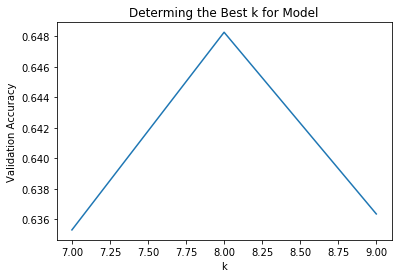

In [390]:
k_list = range(7,10)
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Determing the Best k for Model")
plt.show()

In [391]:

df = pd.read_csv('Preprocessed NBA Data.csv')
print(df.head())

            Player     College  NBA Debut  Position   Ht   Wt  College PTS  \
0       Coby White         UNC       2019         1  196   83         16.1   
1   Jarrett Culver  Texas Tech       2019         2  196   88         14.9   
2  De'Andre Hunter         UVA       2019         3  201  102         12.4   
3   Grant Williams   Tennessee       2019         4  201  107         15.7   
4    Eric Paschall   Villanova       2019         4  203  115         16.5   

   College TRB  College AST  College FG%  College 3P%  College FT%   PTS  TRB  \
0          3.5          4.1        0.423        0.353        0.800  13.2  3.5   
1          5.6          2.8        0.459        0.341        0.687   9.2  3.4   
2          4.4          1.6        0.509        0.419        0.773  12.3  4.5   
3          6.5          2.1        0.516        0.291        0.758   3.5  2.7   
4          6.1          2.1        0.447        0.348        0.746  14.0  4.6   

   AST    FG%   3PT%    FT%  
0  2.7  0.394 

In [392]:
training_data = df[['Position', 'Ht', 'Wt', 'College PTS', 'College TRB', 'College AST', 'College FG%', 'College 3P%', 'College FT%']].values.tolist()
normalized_training = normalize(training_data)

training_labels = df[['PTS', 'TRB', 'AST', 'FG%', '3PT%', 'FT%']].values.tolist()

In [393]:
df2 = pd.read_csv('Test Data.csv')
test_data = df2[['Position', 'Height', 'Wt', 'College PTS', 'College TRB', 'College AST', 'College FG%', 'College 3P%', 'College FT%']].values.tolist()
normalized_test = normalize(test_data)

In [397]:
regressor2 = KNeighborsRegressor(n_neighbors = 8, weights = 'distance')
regressor2.fit(normalized_training, training_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance')

In [398]:
prediction = regressor2.predict(normalized_test)

In [399]:
print(prediction)

[[ 9.70525409  3.47995103  2.27187716  0.44092529  0.2860587   0.76453284]
 [ 9.56544942  4.051522    1.17592907  0.44290923  0.35272103  0.75419967]
 [11.41522094  5.83876779  1.23212744  0.49367554  0.27795114  0.73538769]
 [ 9.02829299  2.591208    2.96943598  0.42594576  0.33059192  0.77848968]
 [ 7.77290366  4.88921801  0.85864756  0.44777522  0.20122478  0.69751229]
 [ 8.77419894  4.2764327   1.372532    0.43092013  0.2858924   0.70711294]
 [ 6.76824324  4.20857669  0.84019687  0.43024738  0.2074553   0.71110977]
 [13.52646195  3.52365621  4.64164167  0.4067572   0.32885773  0.76245558]
 [ 8.90397841  5.17517393  0.80475459  0.53050411  0.24657339  0.70302148]
 [13.14123241  6.60667427  1.50796248  0.48819098  0.21216579  0.68383288]]
